In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('traffic-accidents.csv', header = 1)

In [33]:
data.head()

,Unnamed: 0,Year,Total number of accidents,Fatal Accidents,Non-Fatal Accidents,Killed,Injured,Total number of vehicles involved
0,Pakistan,2008-09,9496,4145,5351,4907,11037,10322
1,Pakistan,2009-10,9747,4378,5369,5280,11173,10496
2,Pakistan,2010-11,9723,4280,5443,5271,11383,10822
3,Pakistan,2011-12,9140,3966,5174,4758,10145,9986
4,Pakistan,2012-13 *,8988,3884,5104,4719,9710,9876


In [34]:
data['Unnamed: 0'].unique()

array(['Pakistan', 'Punjab', 'Sindh', 'Khyber Pakhtunkhwa', 'Balochistan',
       'Islamabad'], dtype=object)

In [35]:
data.rename(columns={'Unnamed: 0': 'Location'}, inplace=True)

In [36]:
data.head()

,Location,Year,Total number of accidents,Fatal Accidents,Non-Fatal Accidents,Killed,Injured,Total number of vehicles involved
0,Pakistan,2008-09,9496,4145,5351,4907,11037,10322
1,Pakistan,2009-10,9747,4378,5369,5280,11173,10496
2,Pakistan,2010-11,9723,4280,5443,5271,11383,10822
3,Pakistan,2011-12,9140,3966,5174,4758,10145,9986
4,Pakistan,2012-13 *,8988,3884,5104,4719,9710,9876


In [37]:
data.isnull().sum()

Location                             0
Year                                 0
Total number of accidents            0
Fatal Accidents                      0
Non-Fatal Accidents                  0
Killed                               0
Injured                              0
Total number of vehicles involved    0
dtype: int64

In [38]:
data.duplicated().sum()

0

In [39]:
data.columns

Index(['Location', 'Year', 'Total number of accidents', 'Fatal Accidents',
       'Non-Fatal Accidents', 'Killed', 'Injured',
       'Total number of vehicles involved'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Location                           62 non-null     object
 1   Year                               62 non-null     object
 2   Total number of accidents          62 non-null     int64 
 3   Fatal Accidents                    62 non-null     int64 
 4   Non-Fatal Accidents                62 non-null     int64 
 5   Killed                             62 non-null     int64 
 6   Injured                            62 non-null     int64 
 7   Total number of vehicles involved  62 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 4.0+ KB


In [41]:
# Goal: Predict a continuous variable

In [42]:
X = data[['Fatal Accidents', 'Non-Fatal Accidents', 'Killed', 'Injured', 'Total number of vehicles involved']]
y = data['Total number of accidents']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 7.29134979054752e-23
R^2 Score: 1.0


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_rf_pred))
print("R^2 Score:", r2_score(y_test, y_rf_pred))


Mean Squared Error: 61635.29649230758
R^2 Score: 0.9958965706682696


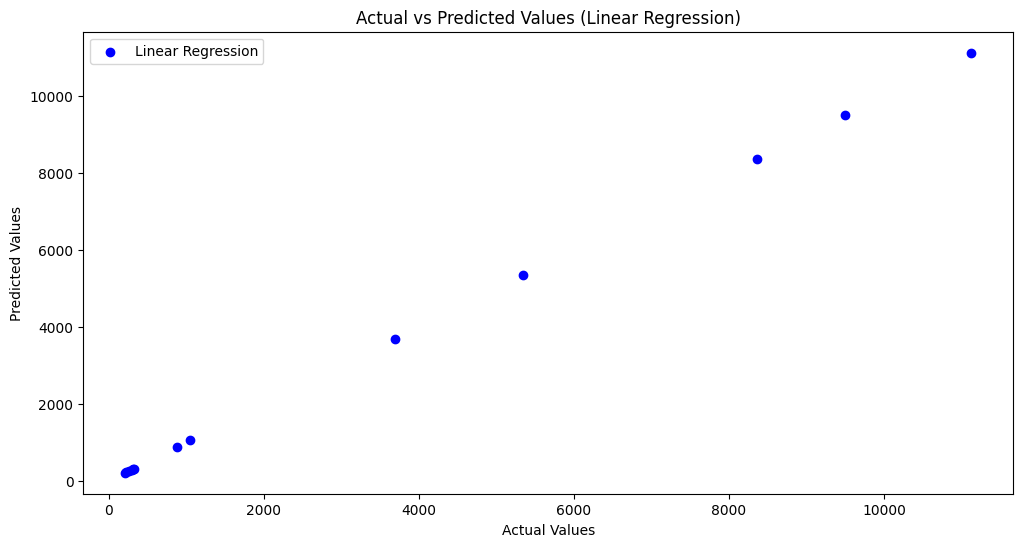

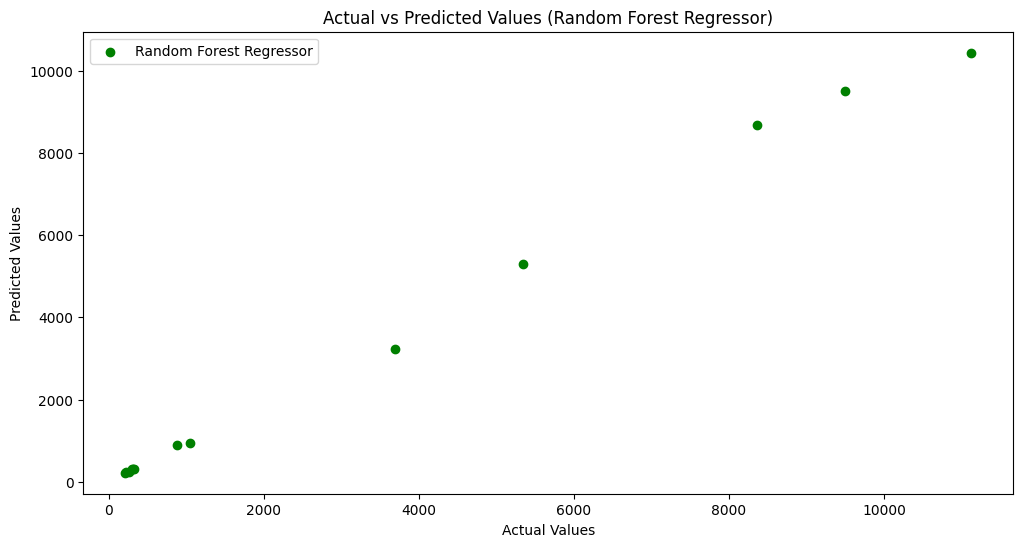

In [46]:
import matplotlib.pyplot as plt

# Plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

# Plot for Random Forest Regressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_rf_pred, color='green', label='Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()
